In [1]:
from astropy.coordinates import SkyCoord, UnitSphericalRepresentation
from itertools import combinations, cycle
from pyipn.io.visualization import SphericalCircle
import astropy.units as u
import numpy as np
%matplotlib notebook
import matplotlib.pyplot as plt

from pyipn import copy_template, Universe

# Start up

We first want to copy the template configuration to our local director so that we can edit it.


In [3]:
copy_template()

We can see how the config looks.

In [44]:
!cat template_config.yaml

## Specify the GRB parameters

grb:

  # Location and distance (degrees and Mpc)
  ra: 80.
  dec: -30.
  distance: 100.

  # lightcurve
  K: 50. # intensity
  t_rise: 1. # rise time
  t_decay: 2. # decay time


# specify the detectors
# each entry is treated as the name of the detector
detectors:

  # name the detector
  det1:

    # it's location in GCRS
    ra: 10.
    dec: 0.
    altitude: 3000. # km
    time: '2010-01-01T00:00:00' # time of detection

    # Where the detector point in the sky
    pointing:
      ra: 10.
      dec: 30.

    # the total effective area
    effective_area: 1.


  # add more detectors!
  
  det2:

    ra: 170.
    dec: -10.
    altitude: 3000.
    time: '2010-01-01T00:00:00'
    
    pointing:
      ra: 10.
      dec: 30.

    effective_area: 1.

  det3:

    ra: 20.
    dec: 40.
    altitude: 15000.
    time: '2010-01-01T00:00:00'
    
    pointing:
      ra: 20.
      dec: 70.

    effective_area: 1.

  # det4:

  #   ra: 60.
  #   dec: -30.
  #   alt

# Make a Universe and blow up a GRB

We can load the configuration from the yaml file.

In [2]:
uni = Universe.from_yaml('template_config.yaml')

Set how long before and after the trigger time that you would like the light curve to last and create the data.

In [3]:
uni.explode_grb(tstart=-50,tstop=50)

<IPython.core.display.Javascript object>


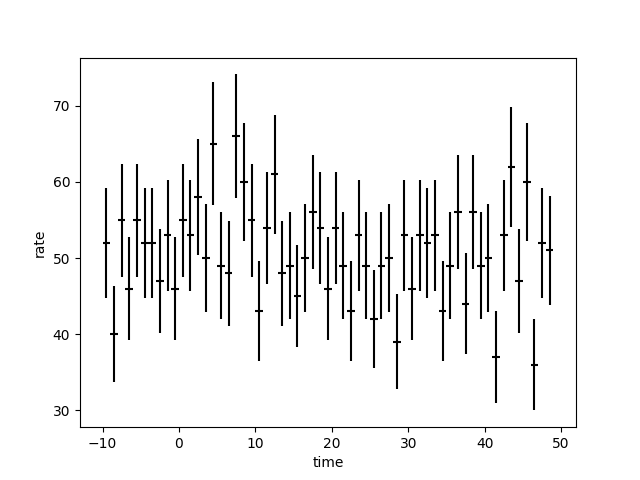

<IPython.core.display.Javascript object>


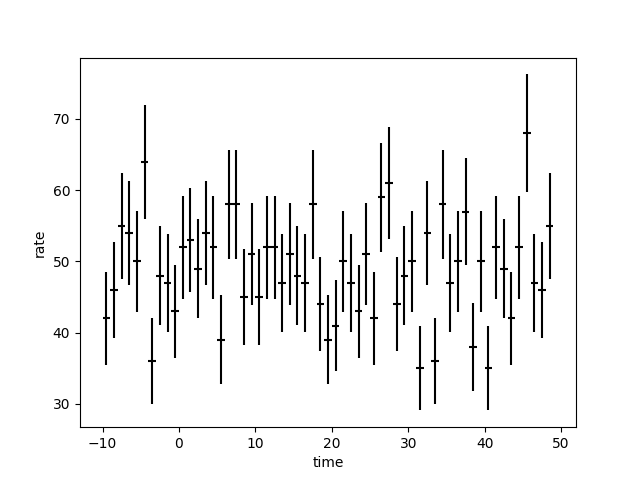

<IPython.core.display.Javascript object>


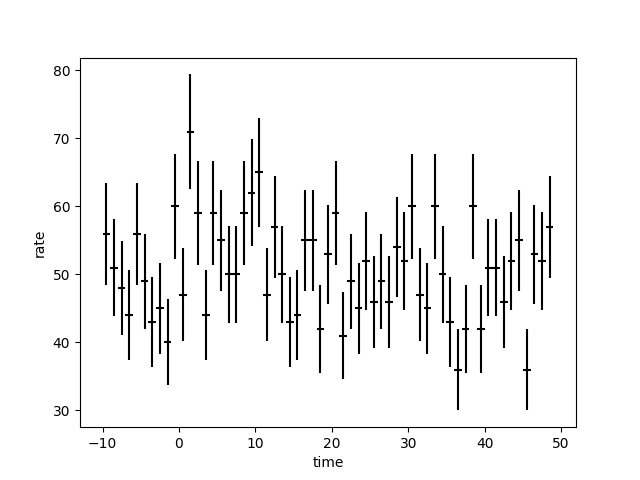

In [5]:
for det, lc in uni.light_curves.items():
    
    lc.display(-10,50,1.)
    

We can now view the light curves.

<IPython.core.display.Javascript object>


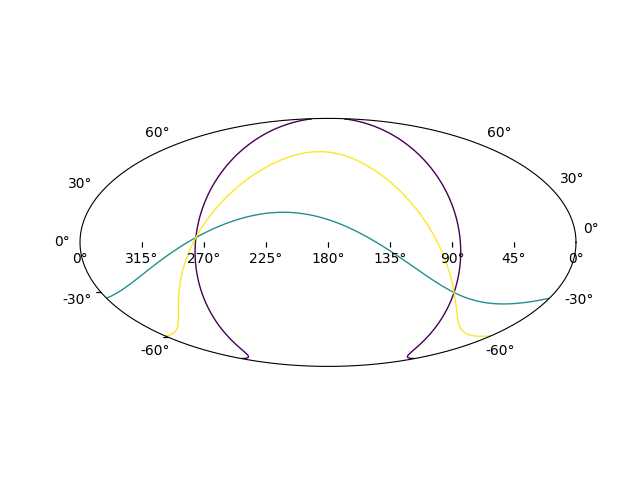

In [8]:
uni.plot_all_annuli(cmap='viridis');

<IPython.core.display.Javascript object>


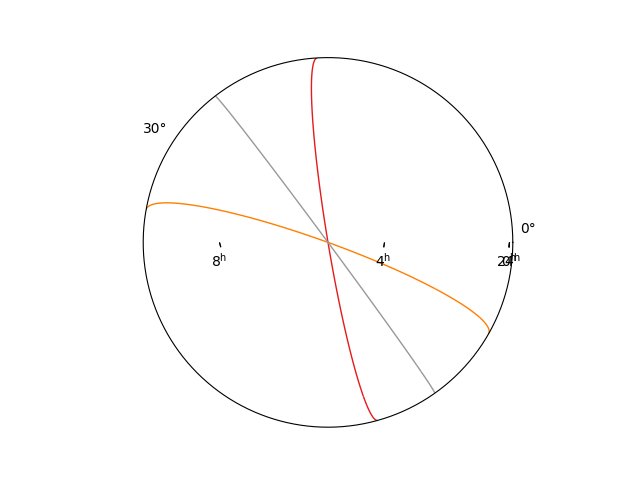

In [6]:
center = SkyCoord(80,-30,unit='deg',frame='icrs')

uni.plot_all_annuli(projection='astro globe',center=center);

Localize GRB ra and dec using triangulation